In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv('911.csv')

print(df.title.unique())

['EMS: BACK PAINS/INJURY' 'EMS: DIABETIC EMERGENCY' 'Fire: GAS-ODOR/LEAK'
 'EMS: CARDIAC EMERGENCY' 'EMS: DIZZINESS' 'EMS: HEAD INJURY'
 'EMS: NAUSEA/VOMITING' 'EMS: RESPIRATORY EMERGENCY'
 'EMS: SYNCOPAL EPISODE' 'Traffic: VEHICLE ACCIDENT -'
 'EMS: VEHICLE ACCIDENT' 'Traffic: DISABLED VEHICLE -'
 'Fire: APPLIANCE FIRE' 'EMS: GENERAL WEAKNESS'
 'Fire: CARBON MONOXIDE DETECTOR' 'EMS: UNKNOWN MEDICAL EMERGENCY'
 'EMS: UNRESPONSIVE SUBJECT' 'Fire: VEHICLE ACCIDENT'
 'EMS: ALTERED MENTAL STATUS' 'Fire: FIRE ALARM' 'EMS: CVA/STROKE'
 'Traffic: ROAD OBSTRUCTION -' 'EMS: SUBJECT IN PAIN' 'EMS: HEMORRHAGING'
 'EMS: FALL VICTIM' 'EMS: ASSAULT VICTIM' 'EMS: SEIZURES'
 'EMS: MEDICAL ALERT ALARM' 'EMS: ABDOMINAL PAINS' 'Fire: PUMP DETAIL'
 'Fire: FIRE INVESTIGATION' 'EMS: OVERDOSE' 'EMS: MATERNITY'
 'EMS: UNCONSCIOUS SUBJECT' 'EMS: CHOKING' 'EMS: LACERATIONS'
 'Fire: TRASH/DUMPSTER FIRE' 'Fire: UNKNOWN TYPE FIRE'
 'Fire: BUILDING FIRE' 'Fire: ELECTRICAL FIRE OUTSIDE'
 'Fire: DEBRIS/FLUIDS ON HIGH

In [5]:
#Split titles into EMS/Fire/Traffic
df['type'] = df["title"].apply(lambda x: x.split(':')[0])
df['type'].value_counts()

EMS        322880
Traffic    225213
Fire        97623
Name: type, dtype: int64

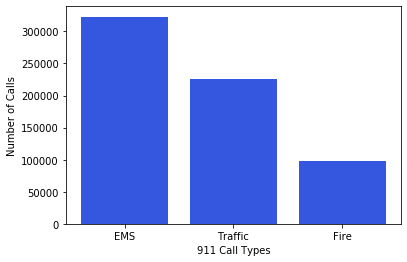

In [6]:
labels = 'EMS', 'Traffic', 'Fire'
counts = [322880, 225213, 97623]
colors = '#3557df', '#ff9a03', '#ec4444'

plt.bar(labels, counts, color = '#3557df')
plt.xlabel("911 Call Types")
plt.ylabel("Number of Calls")

plt.show()

In [7]:
#Group by EMS to break it down further
ems = df.loc[df['type'] == 'EMS']
#Create dataframe of title names and value count
ems_vc = ems['title'].value_counts().rename_axis('title').reset_index(name='count')
ems_counts = ems_vc.iloc[:,1]
#I know from above that the total EMS calls is 322880
#Add a column to display percentage 
ems_vc['percent'] = round((ems_counts / 322880) * 100, 4).astype(str) + '%'

In [8]:
print(tabulate(ems_vc))

--  ---------------------------------  -----  --------
 0  EMS: FALL VICTIM                   33541  10.3881%
 1  EMS: RESPIRATORY EMERGENCY         33355  10.3305%
 2  EMS: CARDIAC EMERGENCY             31488  9.7522%
 3  EMS: VEHICLE ACCIDENT              24922  7.7187%
 4  EMS: SUBJECT IN PAIN               19097  5.9146%
 5  EMS: HEAD INJURY                   17705  5.4835%
 6  EMS: GENERAL WEAKNESS              11472  3.553%
 7  EMS: SYNCOPAL EPISODE              10527  3.2603%
 8  EMS: SEIZURES                      10522  3.2588%
 9  EMS: UNKNOWN MEDICAL EMERGENCY     10344  3.2037%
10  EMS: MEDICAL ALERT ALARM           10009  3.0999%
11  EMS: ALTERED MENTAL STATUS          9790  3.0321%
12  EMS: ABDOMINAL PAINS                8761  2.7134%
13  EMS: UNCONSCIOUS SUBJECT            8484  2.6276%
14  EMS: OVERDOSE                       8082  2.5031%
15  EMS: CVA/STROKE                     8029  2.4867%
16  EMS: HEMORRHAGING                   8017  2.483%
17  EMS: NAUSEA/VOMITING   

In [9]:
#Now do the same for Fire
fire = df.loc[df['type'] == 'Fire']
#Create dataframe of title names and value count
fire_vc = fire['title'].value_counts().rename_axis('title').reset_index(name='count')
fire_counts = fire_vc.iloc[:,1]
#I know from above that the total fire calls is 97623
#Add a column to display percentage 
fire_vc['percent'] = round((fire_counts / 97623) * 100, 4).astype(str) + '%'

In [33]:
print(tabulate(fire_vc))

--  ----------------------------------  -----  --------
 0  Fire: FIRE ALARM                    37187  38.0925%
 1  Fire: VEHICLE ACCIDENT              10594  10.852%
 2  Fire: FIRE INVESTIGATION             9193  9.4168%
 3  Fire: GAS-ODOR/LEAK                  6602  6.7628%
 4  Fire: ELECTRICAL FIRE OUTSIDE        4924  5.0439%
 5  Fire: BUILDING FIRE                  4633  4.7458%
 6  Fire: FIRE SPECIAL SERVICE           3909  4.0042%
 7  Fire: CARBON MONOXIDE DETECTOR       3869  3.9632%
 8  Fire: VEHICLE FIRE                   3136  3.2124%
 9  Fire: WOODS/FIELD FIRE               2390  2.4482%
10  Fire: UNKNOWN TYPE FIRE              1885  1.9309%
11  Fire: FIRE POLICE NEEDED             1548  1.5857%
12  Fire: CARDIAC ARREST                 1295  1.3265%
13  Fire: APPLIANCE FIRE                 1184  1.2128%
14  Fire: TRASH/DUMPSTER FIRE            1117  1.1442%
15  Fire: ELEVATOR EMERGENCY              870  0.8912%
16  Fire: RESCUE - ELEVATOR               736  0.7539%
17  Fire

In [10]:
#Lastly, traffic
traffic = df.loc[df['type'] == 'Traffic']
#Create dataframe of title names and value count
traffic_vc = traffic['title'].value_counts().rename_axis('title').reset_index(name='count')
#I know from above that the total Traffic calls is 225213
traffic_counts = traffic_vc.iloc[:,1]
#Add a column to display percentage 
traffic_vc['percent'] = round((traffic_counts / 225213) * 100, 4).astype(str) + '%'

In [31]:
print(tabulate(traffic_vc))

-  ------------------------------------  ------  --------
0  Traffic: VEHICLE ACCIDENT -           145526  64.6171%
1  Traffic: DISABLED VEHICLE -            46808  20.7839%
2  Traffic: ROAD OBSTRUCTION -            22445  9.9661%
3  Traffic: HAZARDOUS ROAD CONDITIONS -    6689  2.9701%
4  Traffic: VEHICLE FIRE -                 3260  1.4475%
5  Traffic: VEHICLE LEAKING FUEL -          286  0.127%
6  Traffic: DEBRIS/FLUIDS ON HIGHWAY -      199  0.0884%
-  ------------------------------------  ------  --------


In [11]:
#Next, heat map of most frequent location of calls


In [22]:
#Average PA firefighter hourly wage is $20.27
#https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Firefighter-Salary-by-State
#Counselor hourly wage is $20.20
#https://www.indeed.com/salaries/mental-health-counselor-Salaries,-Pennsylvania
#Average DMV worker hourly wage is $16 in PA
#https://www.ziprecruiter.com/Salaries/How-Much-Does-a-DMV-Clerk-Make-a-Year--in-Pennsylvania
#Median EMT hourly wage is $18 in PA
#https://www.salary.com/tools/salary-calculator/emergency-medical-technician-hourly/pa
#Median police patrol officer is $27 in PA 
#https://www.salary.com/tools/salary-calculator/police-patrol-officer-hourly/pa

jobs = ['Patrol Officer', 'Firefighter', 'Social Worker', 'DMV Clerk', 'EMT']
hourly_wages = ['$27.00', '$20.27', '$20.20', '$16.00', '$18.00']
wage_comparison = {'Job Title': jobs, 'Hourly Wage': hourly_wages}
df_wage = pd.DataFrame(data=wage_comparison)
print(tabulate(df_wage))

-  --------------  ------
0  Patrol Officer  $27.00
1  Firefighter     $20.27
2  Social Worker   $20.20
3  DMV Clerk       $16.00
4  EMT             $18.00
-  --------------  ------


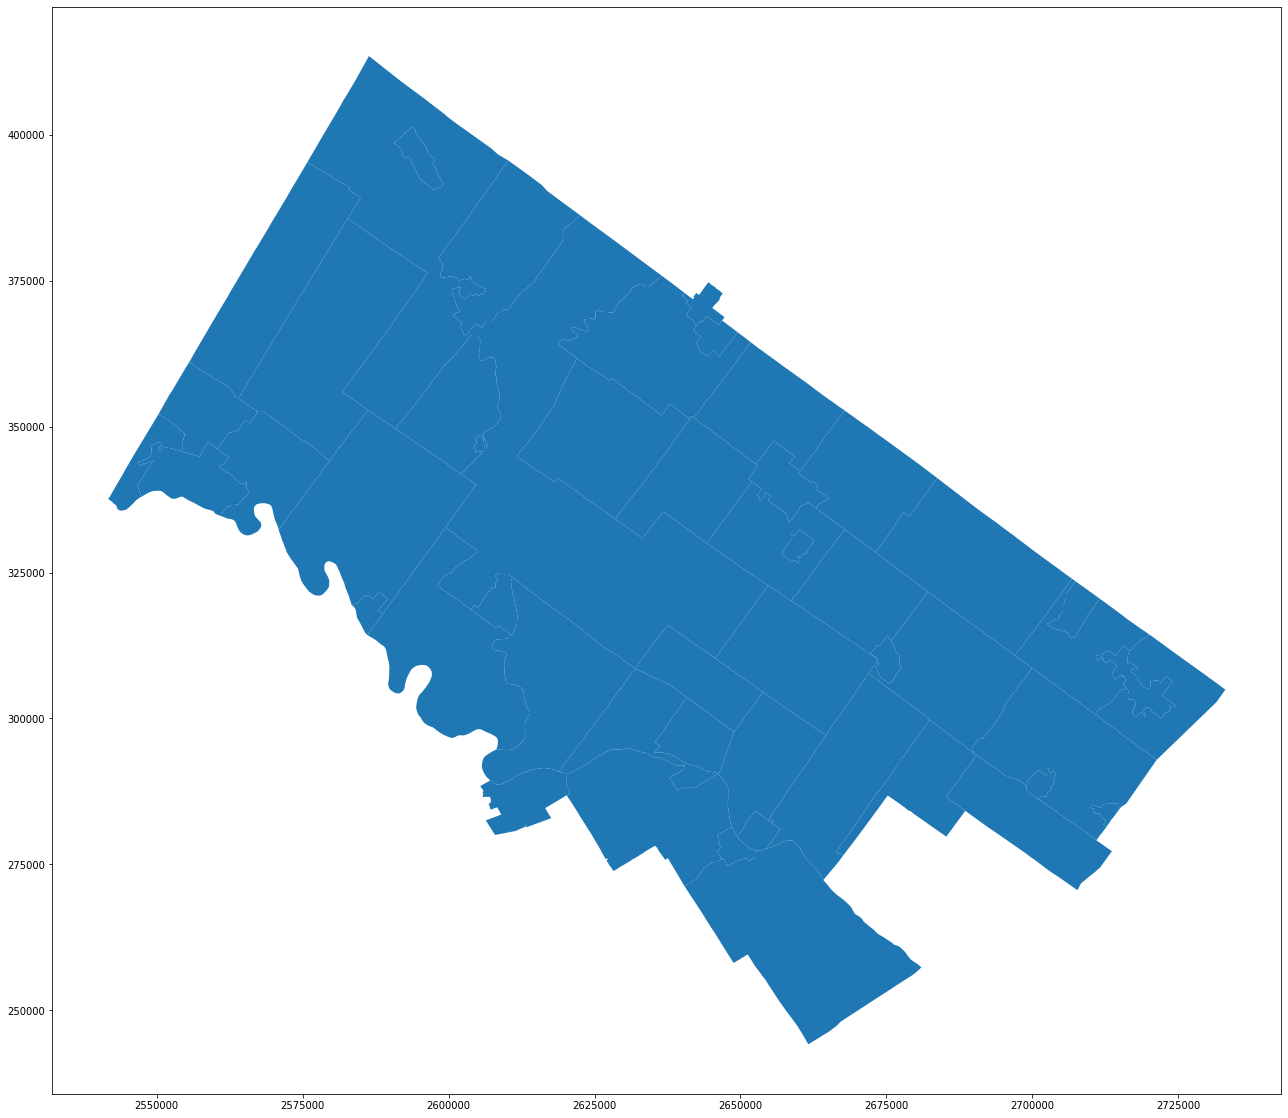

In [31]:
import geopandas as gpd

regions = gpd.read_file('MontgomeryCounty_PoliceDistricts201908/MontgomeryCounty_PoliceDistricts201908.shp')

regions.plot(figsize=(40,20))
plt.show()
#Map of Montgomery County by Police Districts

In [35]:
#Make new dataframe that counts number of 

In [60]:
from collections import Counter

print(len(Counter(df['twp']).keys()))
print(len(Counter(regions['Municipali']).keys()))

69
49


In [61]:
df_twp = list(Counter(df['twp']).keys())
regions_municipali = list(Counter(regions['Municipali']).keys())
for i in range(len(regions_municipali)):
    regions_municipali[i] = regions_municipali[i].upper()

diff_1 = []
for i in range(len(df_twp)):
    if df_twp[i] not in regions_municipali:
        diff_1.append(df_twp[i])
            
print(Counter(diff_1).keys())
print(len(Counter(diff_1).keys()))

diff_2 = []
for i in range(len(regions_municipali)):
    if regions_municipali[i] not in df_twp:
        diff_2.append(regions_municipali[i])
print(Counter(diff_2).keys())
print(len(Counter(diff_2).keys()))

dict_keys(['HATFIELD TOWNSHIP', 'DELAWARE COUNTY', 'CHESTER COUNTY', 'UPPER HANOVER', 'UPPER SALFORD', 'UPPER FREDERICK', 'SALFORD', 'HATFIELD BORO', 'LEHIGH COUNTY', 'WORCESTER', 'SCHWENKSVILLE', 'PERKIOMEN', 'BUCKS COUNTY', 'RED HILL', 'EAST GREENVILLE', 'BERKS COUNTY', 'TRAPPE', nan, 'NARBERTH', 'GREEN LANE', 'PHILA COUNTY'])
21
dict_keys(['HATFIELD TWP'])
1


In [64]:
print(Counter(regions['Municipali']).keys())

dict_keys(['Skippack', 'Lower Moreland', 'Cheltenham', 'Bryn Athyn', 'Springfield', 'Abington', 'Rockledge', 'Whitemarsh', 'Jenkintown', 'Lower Merion', 'Upper Moreland', 'Hatboro', 'West Conshohocken', 'Horsham', 'Upper Dublin', 'Conshohocken', 'Ambler', 'Plymouth', 'Lower Gwynedd', 'Whitpain', 'Montgomery', 'East Norriton', 'North Wales', 'Upper Gwynedd', 'Norristown', 'Lansdale', 'Bridgeport', 'Hatfield Twp', 'Upper Merion', 'Collegeville', 'Towamencin', 'Lower Salford', 'West Norriton', 'Franconia', 'Souderton', 'Lower Providence', 'Telford', 'Upper Providence', 'Lower Frederick', 'Marlborough', 'Pennsburg', 'Limerick', 'Royersford', 'Lower Pottsgrove', 'New Hanover', 'Douglass', 'Upper Pottsgrove', 'Pottstown', 'West Pottsgrove'])


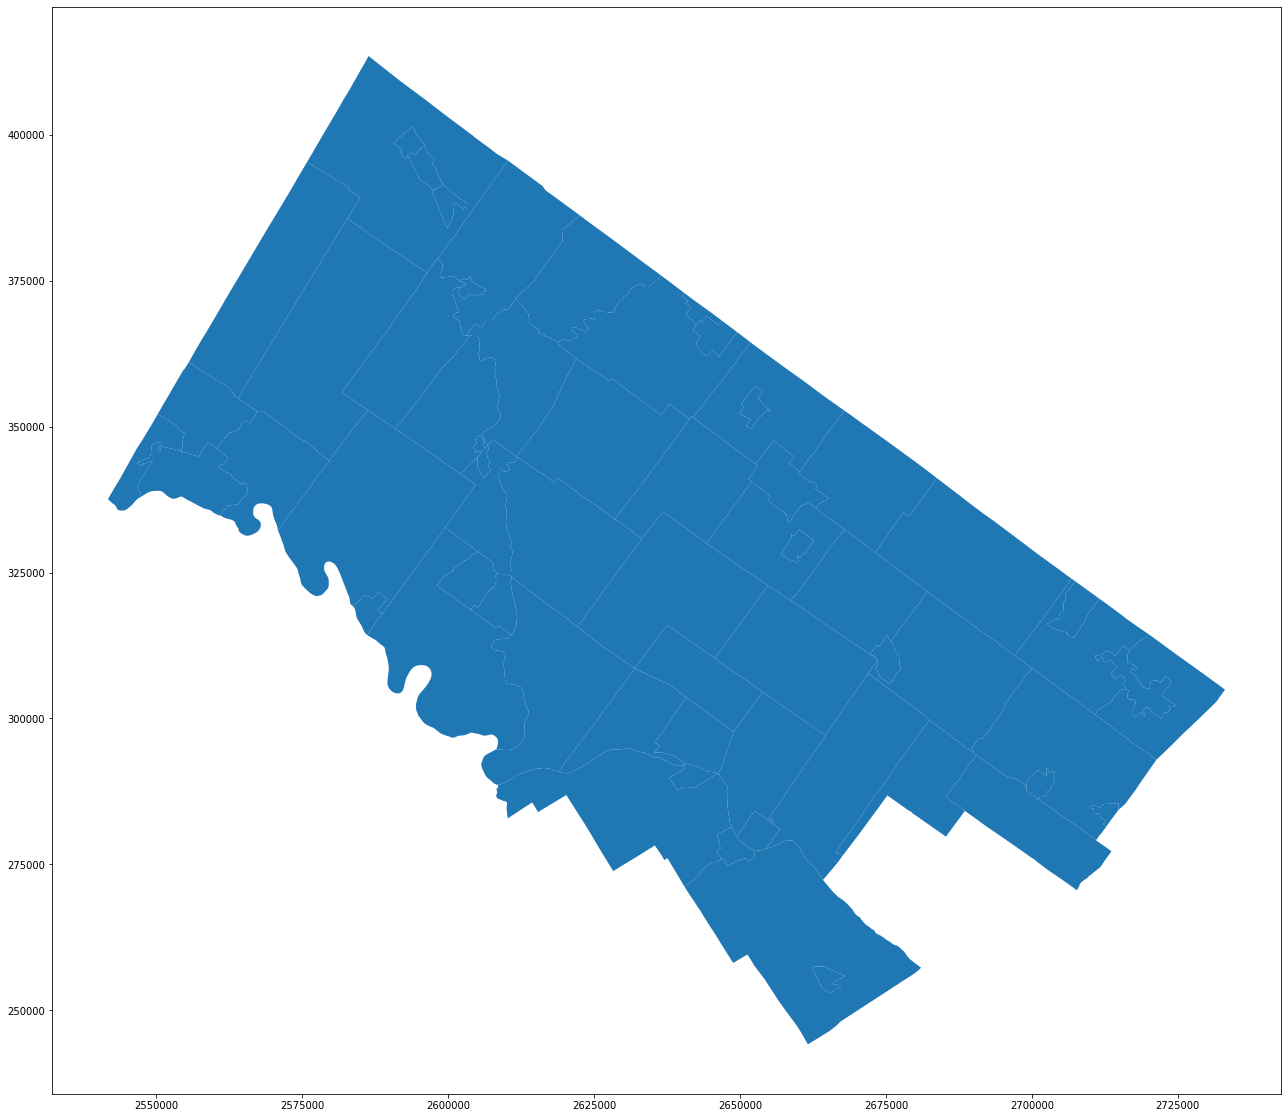

In [66]:
import geopandas as gpd

regions = gpd.read_file('MontgomeryCounty_MunicipalBoundaries201908/MontgomeryCounty_MunicipalBoundaries201908.shp')

regions.plot(figsize=(40,20))
plt.show()


In [67]:
print(regions)

               Name  Municipal_  PA_County_  PA_Municip  FIPS_Count  \
0          Abington          30          46         101          91   
1            Ambler           1          46         401          91   
2        Bridgeport           2          46         402          91   
3        Bryn Athyn           3          46         403          91   
4        Cheltenham          31          46         102          91   
..              ...         ...         ...         ...         ...   
57    West Norriton          63          46         111          91   
58  West Pottsgrove          64          46         112          91   
59       Whitemarsh          65          46         224          91   
60         Whitpain          66          46         225          91   
61        Worcester          67          46         226          91   

    FIPS_Munic  Federal_ID       GEOID          Municipal1   Sq_Miles  \
0          156  23-6000025  4209100156  1st Class Township  15.498995   
1